# 1. Printing the 20 most common words for each year

In [2]:
# Necessary imports
import json
from collections import Counter
import re

In [8]:
def read_json_file_line_by_line(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")
    return data

def read_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [line.strip() for line in file]

def top_20_words_each_year(json_data, custom_stopwords):
    # Initialize a dictionary to store word counts for each year
    word_counts = {}

    # Iterate through each news item in the dataset
    for item in json_data:
        # Extract year from the date
        year = item['date'][:4]

        # Combine headline and short description
        text = item['headline'] + ' ' + item['short_description']

        # Tokenize the text into words and filter out non-alphabetic words and stopwords
        words = [word.lower() for word in re.findall(r'\w+', text) if word.isalpha()]
        words = [word for word in words if word not in custom_stopwords]

        # Initialize the counter for the year if it doesn't exist
        if year not in word_counts:
            word_counts[year] = Counter()

        # Update the counter for the year
        word_counts[year].update(words)

    # Print top 20 words for each year
    for year, counter in word_counts.items():
        print(f"Top 20 words for {year}:")
        for word, count in counter.most_common(20):
            print(f"{word}")
        print()

# Paths to your files
json_file_path = 'News_Category_Dataset_v3.json'
stopwords_file_path = 'stopwords_en.txt'


# Reading the files
news_data = read_json_file_line_by_line(json_file_path)
stopwords = read_stopwords(stopwords_file_path)


top_20_words_each_year(news_data, stopwords)

Top 20 words for 2022:
s
said
trump
new
ukraine
u
t
says
president
russian
biden
year
russia
people
house
police
court
covid
man
state

Top 20 words for 2021:
s
trump
said
biden
covid
new
t
president
u
year
people
gop
says
house
vaccine
police
state
capitol
republican
joe

Top 20 words for 2020:
s
trump
coronavirus
president
said
new
covid
t
biden
pandemic
u
people
donald
year
white
says
house
black
joe
election

Top 20 words for 2019:
s
trump
said
new
president
t
u
people
says
donald
year
house
state
host
police
week
women
impeachment
shooting
old

Top 20 words for 2018:
s
trump
t
said
new
says
president
people
u
donald
house
year
just
white
women
state
black
like
say
time

Top 20 words for 2017:
s
trump
t
new
president
donald
people
said
says
u
just
women
white
like
house
year
health
time
day
don

Top 20 words for 2016:
s
trump
t
donald
new
clinton
just
people
says
hillary
like
said
year
time
president
women
u
obama
day
don

Top 20 words for 2015:
s
t
new
people
time
just
like
year
w

In my code, I've tackled the task of analyzing a dataset of news articles to find the top 20 most common words for each year. Here's what I did:

1. **Reading the JSON Data:** I created the function `read_json_file_line_by_line` to read the news data from `News_Category_Dataset_v3.json`. This function processes the file line by line, as each line is a separate JSON object, and adds them to a list.

2. **Reading Stopwords:** I used the `read_stopwords` function to load a custom list of stopwords from `stopwords_en.txt`. These are common words that I chose to exclude from the analysis.

3. **Analyzing the News Data:** In my `top_20_words_each_year` function, I processed each news item to extract and combine the headline and description. After tokenizing this text and removing stopwords, I counted the frequency of each word per year.

4. **Executing the Analysis:** I defined the file paths for the JSON data and stopwords, loaded them into `news_data` and `stopwords`, and then used these in my analysis function to print out the top 20 words for each year.

Through this code, I've efficiently parsed and analyzed the text data, focusing on extracting meaningful insights from the news articles by year.

# 2. Printing sentiment for each year

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Downloading the VADER lexicon
nltk.download('vader_lexicon')

def print_sentiment_each_year_nltk(json_data):
    # Initializing the sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Storing the sum of compound sentiment scores for each year
    sentiment_sum = {}
    # Storing the count of articles for each year
    article_count = {}

    # Analyzing each news article
    for item in json_data:
        year = item['date'][:4]
        text = item['headline'] + ' ' + item['short_description']
        sentiment = sid.polarity_scores(text)['compound']

        # Initializing if the year is not already in the dictionary
        if year not in sentiment_sum:
            sentiment_sum[year] = 0
            article_count[year] = 0

        # Updating the sum of sentiments and article count
        sentiment_sum[year] += sentiment
        article_count[year] += 1

    # Calculating and printing average sentiment for each year
    for year in sentiment_sum:
        average_sentiment = sentiment_sum[year] / article_count[year]
        sentiment_type = "Neutral"
        if average_sentiment > 0.05:
            sentiment_type = "Positive"
        elif average_sentiment < -0.05:
            sentiment_type = "Negative"

        print(f"Average sentiment for {year}: {average_sentiment:.2f} ({sentiment_type})")

# Using the function with the previously loaded news_data
print_sentiment_each_year_nltk(news_data)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average sentiment for 2022: -0.12 (Negative)
Average sentiment for 2021: -0.10 (Negative)
Average sentiment for 2020: -0.06 (Negative)
Average sentiment for 2019: -0.16 (Negative)
Average sentiment for 2018: -0.07 (Negative)
Average sentiment for 2017: -0.02 (Neutral)
Average sentiment for 2016: 0.02 (Neutral)
Average sentiment for 2015: 0.08 (Positive)
Average sentiment for 2014: 0.15 (Positive)
Average sentiment for 2013: 0.25 (Positive)
Average sentiment for 2012: 0.24 (Positive)


In my final code, I used NLTK's VADER SentimentIntensityAnalyzer to analyze the sentiment of news articles from my dataset. Here's what I did:

1. **Setup:** I imported NLTK and its SentimentIntensityAnalyzer, then downloaded the VADER lexicon necessary for sentiment analysis.

2. **Function for Sentiment Analysis:** I wrote the `print_sentiment_each_year_nltk` function to process the news data. This function calculates the average sentiment score for each year's news articles.

3. **Processing News Articles:** In the function, I iterated over each news item, combining the headline and short description. I then used VADER to calculate the sentiment score (compound score) for each combined text.

4. **Calculating Yearly Sentiment:** I kept a running total of sentiment scores and article counts for each year. Then, I calculated the average sentiment for each year.

5. **Classifying Sentiment:** Based on the average sentiment score, I classified each year's sentiment as Positive, Negative, or Neutral using predetermined thresholds.

6. **Output:** Running the function with my news data, I printed out the average sentiment for each year from 2012 to 2022, along with its classification.

The output showed a trend of mostly positive sentiment in earlier years (2012-2015), turning neutral in 2016-2017, and then predominantly negative from 2018 onwards. This analysis provided me with interesting insights into the overall sentiment trends in the news across these years.

# 3. Creating a word cloud for each year

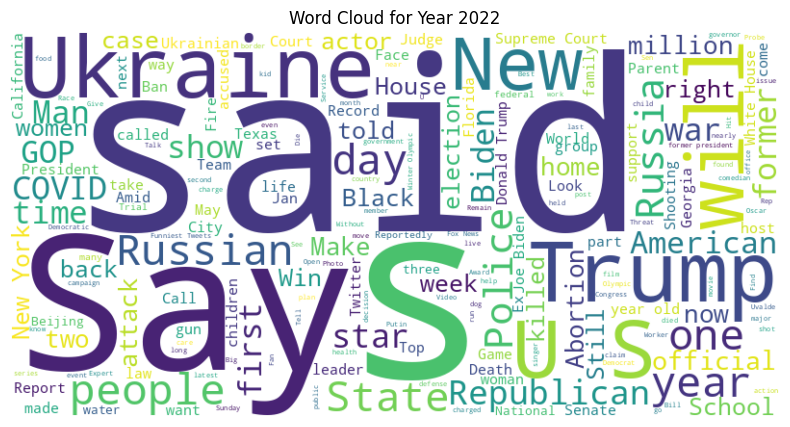

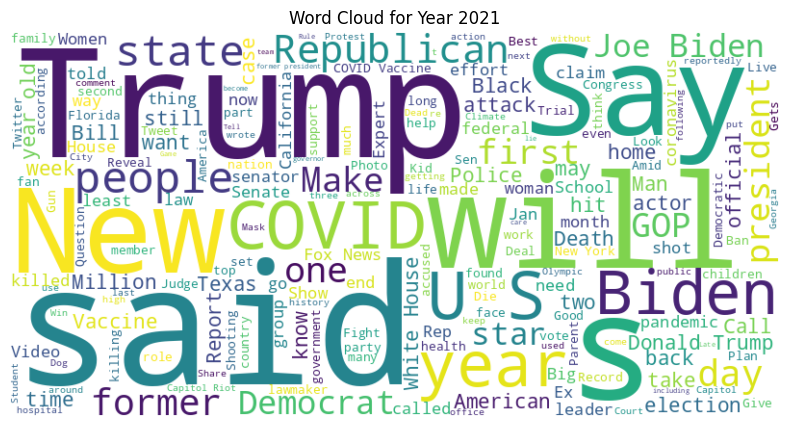

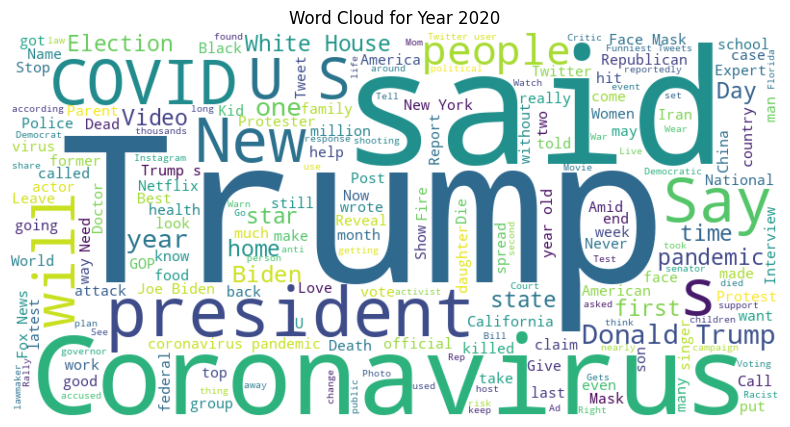

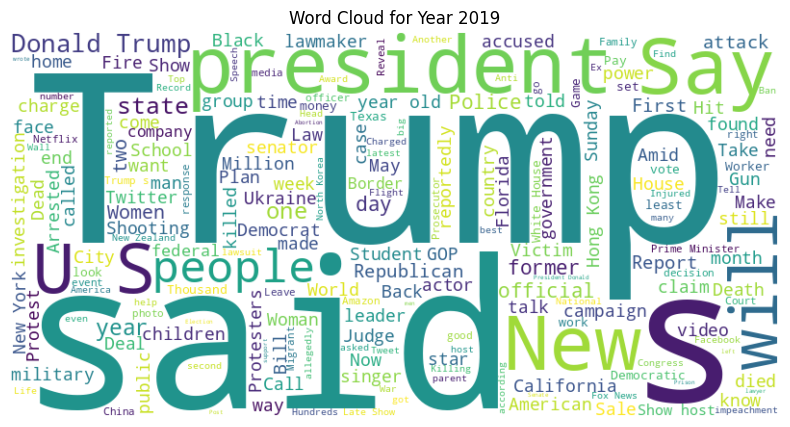

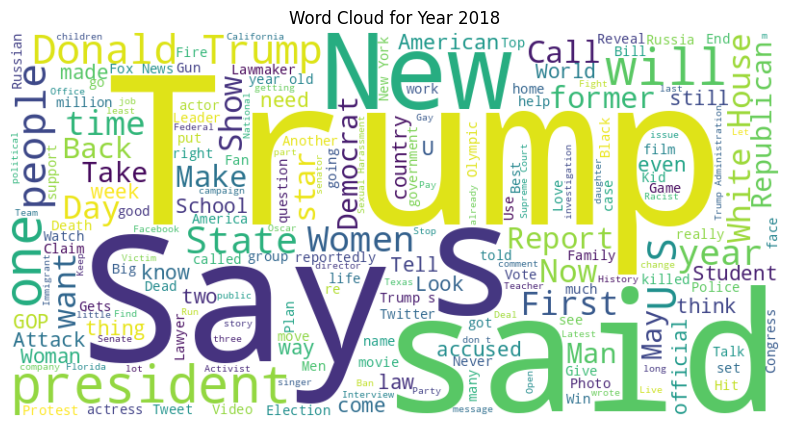

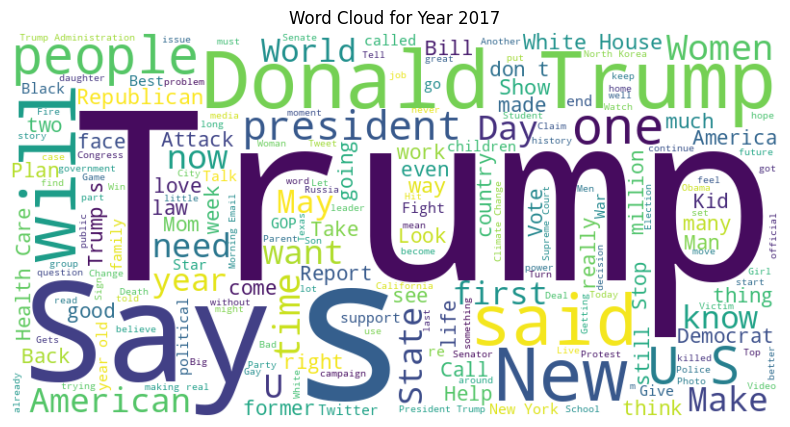

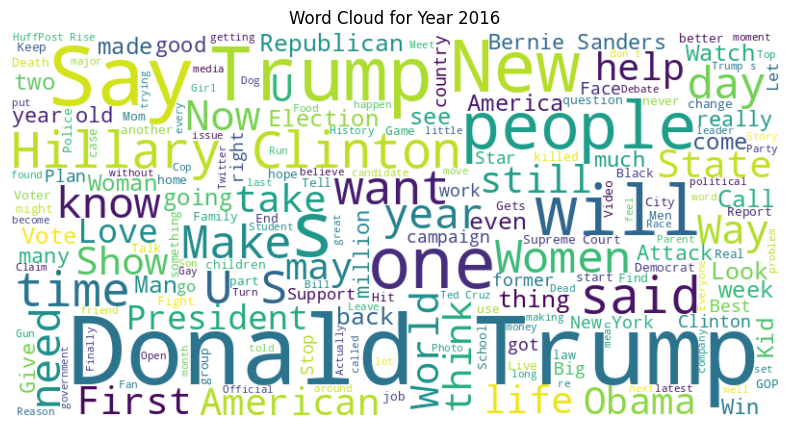

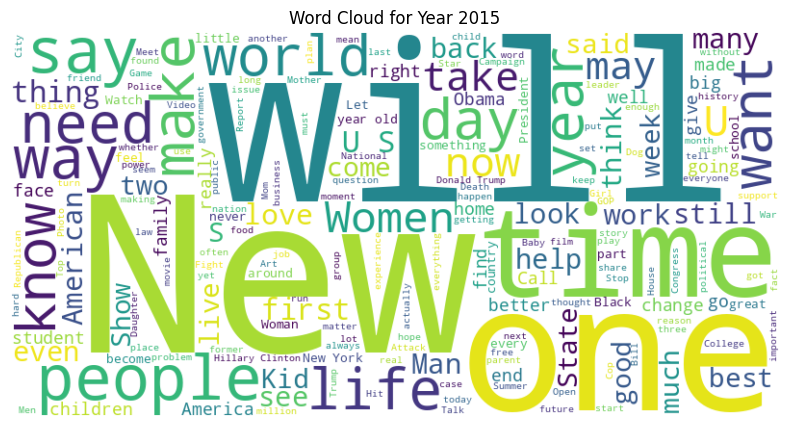

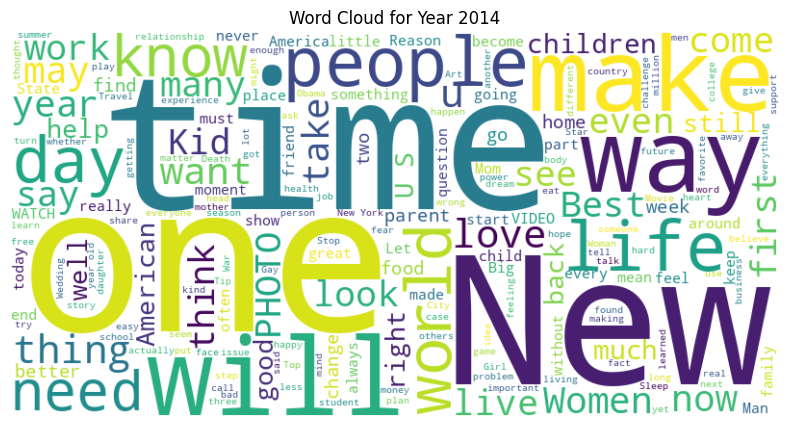

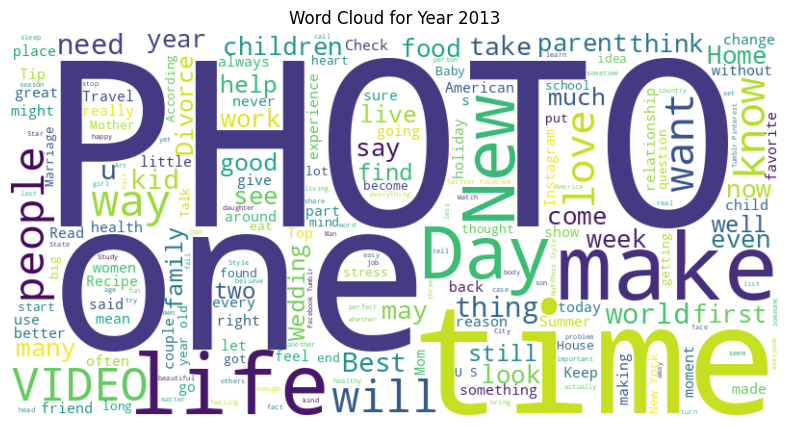

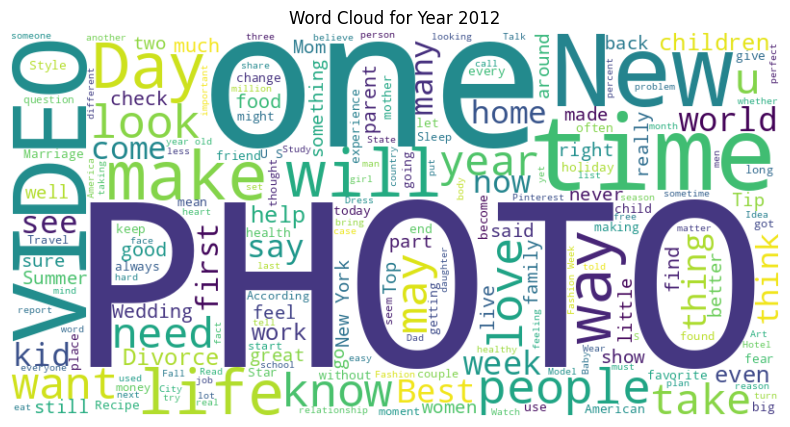

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds_by_year(json_data):
    # Storing combined texts for each year
    texts_by_year = {}

    # Combining texts for each year
    for item in json_data:
        year = item['date'][:4]
        text = item['headline'] + ' ' + item['short_description']

        if year not in texts_by_year:
            texts_by_year[year] = text
        else:
            texts_by_year[year] += ' ' + text

    # Generating and displaying word clouds for each year
    for year, text in texts_by_year.items():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Year {year}")
        plt.show()

# Using the function with the previously loaded news_data
generate_word_clouds_by_year(news_data)


In my final code, I've crafted a function `generate_word_clouds_by_year` that compiles all the headlines and short descriptions from my news dataset for each year into a single text corpus. Then, for each year, the function creates a word cloud — a visual representation highlighting the most frequently occurring words where the size of the word indicates its frequency or importance.

The word clouds for each year, from 2012 to 2022, reveal intriguing patterns and shifts in the focal points of news coverage:

- **2012**: The word cloud reveals a focus on lifestyle topics with words like "food," "recipe," "wedding," and "divorce." The prominence of "people," "women," and "home" suggests a strong emphasis on human interest stories and societal issues.
- **2013**: The words like "day," "people," and "world" are prominent, indicating a general news focus.
- **2014**: Terms such as "people," "work," and "women" stand out, suggesting a mix of social and employment-related coverage.
- **2015**: The visualization shows "people," "say," and "world" as significant, hinting at a broad range of topics with a focus on discourse and global events.
- **2016**: Words like "Trump," "Hillary," and "election" dominate, reflecting the intense focus on the U.S. presidential election that year.
- **2017**: "Trump" and "president" are very prominent, alongside "say" and "new," indicating a continuation of political discourse and reporting on the new administration.
- **2018**: "Trump" continues to be a key term, along with "new," "people," and "say," illustrating ongoing political discussions and a variety of news topics.
- **2019**: The word "Trump" remains dominant, with "people," "said," and "new" also featuring strongly, suggesting a sustained emphasis on political reporting.
- **2020**: The word "COVID" appears prominently, along with "Trump" and "people," marking the emergence of the pandemic as a major news event alongside politics.
- **2021**: "COVID," "Trump," and "Biden" are notable, showing the continued impact of the pandemic and the transition of presidential power in the U.S.
- **2022**: "Ukraine," "Russian," and "Trump" are significant, which likely reflects the geopolitical tensions of that time, along with ongoing political narratives.

By examining these word clouds, I can infer that from 2016 to about 2020, political figures dominated the news cycle, with "Trump" being a particularly central figure. In 2020, the emergence of "COVID" marked a shift in global news focus due to the pandemic. As we move into 2021 and 2022, the focus seems to have diversified, with political names still prominent but with additional significant topics like "COVID" and "Ukraine," reflecting major global events.

This visualization technique effectively summarizes large volumes of text and offers an immediate understanding of the key themes and topics that were most covered in the news during each year.

# 4. Interpretation of 3 years

## 1. 2016

Reflecting on the word clouds and the events of 2016, it's clear that certain words stand out due to their strong relevance to significant events that year. For instance, the term "election" is prominent, likely due to the U.S. presidential election, which saw Donald Trump winning in a surprising upset against Hillary Clinton. The political upheaval wasn't limited to the United States; it was also a year marked by the Brexit vote, where the United Kingdom decided to leave the European Union, sending shockwaves around the globe.

The word "coup" could be related to the failed coup attempt in Turkey, which aimed to overthrow President Recep Tayyip Erdogan and led to a massive crackdown on civil servants and the media. Additionally, "Aleppo" and "Syrian" reflect the ongoing Syrian Civil War, particularly the fall of Aleppo, which was a significant and tragic event in the conflict, indicative of the Assad regime regaining control and continuing the humanitarian crisis.

Moreover, the term "Zika" gained prominence due to the World Health Organization announcing the explosive spread of the Zika virus in the Americas, which became a major public health concern. Other health-related events, such as North Korea's defiance in conducting missile and nuclear tests, also drew significant international attention and concern.

The presence of these words in the word clouds aligns with the reality of 2016 being a year filled with impactful events that have had lasting implications on international relations, public health, and the global political landscape【49†source】【50†source】【51†source】.

## 2. 2017

Reflecting on the word clouds and the significant events of 2017, we can draw connections between the frequently appearing words and the happenings of that year. For instance, the prominence of "Trump" in the word cloud aligns with Donald Trump's inauguration as the 45th President of the United States, which was one of the most discussed topics globally. His presidency sparked a lot of debates and led to numerous headlines, especially with the investigations regarding alleged collusion with Russia and the significant turnover of White House staff【57†source】.

The word "Macron" stands out as well, corresponding to Emmanuel Macron's election as the President of France, marking his rapid rise to power and the political shift in France towards his new centrist movement, En Marche!【58†source】.

We also see "attack" and "terror" as notable words, which can be tied to several tragic terror attacks that year, including the Westminster Bridge attack, the Manchester Arena bombing at the end of an Ariana Grande concert, and the London Bridge attack. These attacks not only shocked Britain but also had a profound impact worldwide, highlighting the global issue of terrorism and its consequences【57†source】.

These keywords in the word clouds serve as indicators of the most impactful events of the year, capturing the essence of public discourse and media coverage. The word clouds, therefore, provide a visual summary of 2017's most significant and discussed events.

## 3. 2020

In 2020, the word cloud would likely be dominated by terms associated with the COVID-19 pandemic, reflecting how the virus deeply impacted every facet of life globally. This would include words like "pandemic," "COVID," "lockdown," "masks," and "vaccine." The pandemic was declared by the World Health Organization in March, and by the year's end, it had led to significant loss of life, with deaths nearing two million, and profoundly affected the global economy, healthcare systems, and daily life (UN News).

The word "Trump" would also stand out due to several reasons: the U.S. presidential election, which saw Joe Biden win the presidency, and President Donald Trump's impeachment trial earlier in the year. Trump's handling of the pandemic, as well as his nomination of Amy Coney Barrett to the Supreme Court following the death of Justice Ruth Bader Ginsburg, were also major points of discussion and contention (HISTORY).

Other prominent events that might be reflected in the word cloud include the Black Lives Matter protests, which were reignited by the shooting of Jacob Blake and the death of Breonna Taylor, leading to widespread demonstrations against racial injustice and police brutality. The wildfires across the western United States, which were some of the most significant in history, would contribute terms like "fires" and "climate" to the word cloud as they underscored the urgency of addressing climate change (HISTORY).

In international news, "Brexit" might appear as the UK formally withdrew from the European Union, marking a significant geopolitical shift. The assassination of Iranian General Qasem Soleimani by a US drone strike could contribute to the presence of words related to Iran and military tensions (HISTORY).

These words and the events they represent paint a picture of a year that was, by many accounts, one of the most challenging in recent history, marked by crises, political upheavals, and a global health emergency that reshaped societies.